In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set_style("darkgrid")


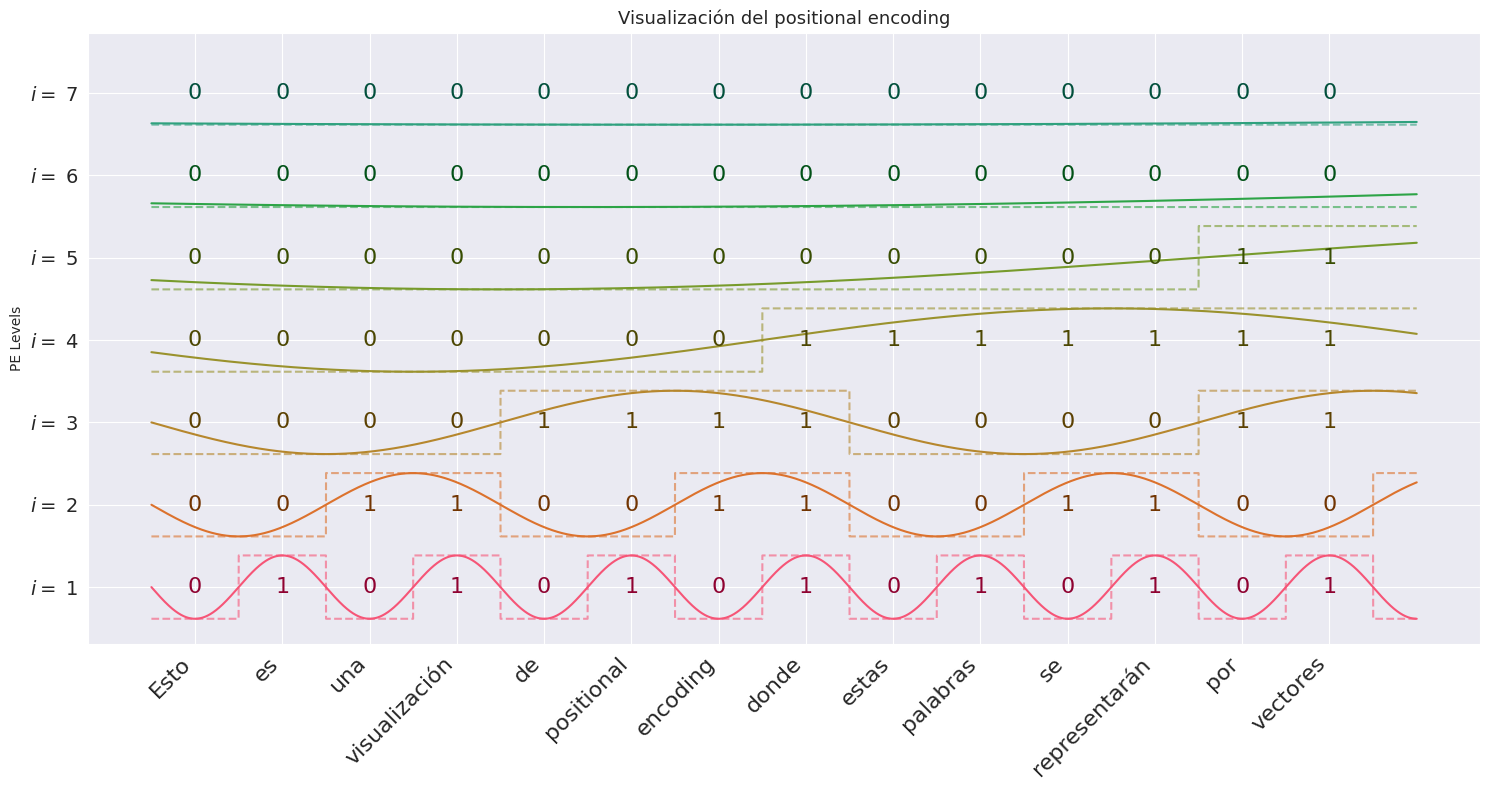

In [7]:
# Frase de ejemplo
sentence = "Esto es una visualización de positional encoding donde estas palabras se representarán por vectores"
tokens = sentence.split()

def cos2(x_vect,freq,offset):
    return np.cos((x_vect-offset) * (2*np.pi)/freq )

def squared_cos2(x_vect, freq,offset):
    cos_values = cos2(x_vect, freq,offset)
    return np.where(cos_values > 0, 1, -1)

# Configurar plot
fig, ax = plt.subplots(figsize=(15, 8))
N=10000
x = np.linspace(-0.5,len(tokens),N)
y = np.linspace(0, 2 * np.pi, len(tokens))

n_colors = len(tokens)
pastel_rainbow = sns.husl_palette(n_colors=n_colors, s=0.9, l=0.6)
pastel_rainbow_text = sns.husl_palette(n_colors=n_colors, s=1, l=0.3)


# Crear y graficar las funciones sinusoidales y cuadradas
levels=7
for i in range(levels):
    if i>0:
        offset_x=i-1+0.5
    else:
        offset_x=0
    cos_wave = -cos2(x,2**(i+1),offset_x)
    square_wave = -squared_cos2(x,2**(i+1),offset_x)
    offset = 2.6 * i

    texto=[ "0" if j<0.5 else "1"  for j in -squared_cos2(np.arange(0,len(tokens)),2**(i+1),offset_x)]

    ax.plot(x, cos_wave + offset, color=pastel_rainbow[i] , label=f"PE Level {i+1}")
    ax.plot(x, square_wave + offset,color=pastel_rainbow[i],alpha=0.6, linestyle="--")
    [ax.text(k,offset,j,ha='center', va='center',fontdict={"fontsize":16}, color=pastel_rainbow_text[i]) for k,j in enumerate(texto)]

# Configurar yaxis y xaxis
plt.yticks(np.arange(0, 2.6* levels, 2.6), [f"$i=$ {i+1}" for i in range(levels)],fontdict={"fontsize":14})
plt.xticks(np.arange(len(tokens)), tokens,fontdict={"fontsize":16},rotation=45, ha='right')
plt.xlabel("")
plt.ylabel("PE Levels")
plt.title("Visualización del positional encoding",fontdict={"fontsize":13})

# Mostrar leyenda y plot
ax.legend().set_visible(False)
plt.ylim(top=2.5* levels)
plt.tight_layout()

